<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/ver4_SP_Proj4__Spotify_Fina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


# Business Question:

> Which features have impact on the popularity of new songs on Spotify?

# Project Aim:

This project focuses on prediction of popularity of a new song using a tree - based regression model that was trained on the selected features. The data features were collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021.

The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The hyperparameters of the trees should be carefully selected to avoid over-fitting.


The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



# Additional Question Info:
- From the previous dataset, what could make those songs popular??
    - Does the dancebility along with the date release impact the popularity of the songs (For example, some songs with high scores of dancebility were lauched during the new year season to get more popularity?
    - Artist followers
**Used only essential features**
    - Release date: Mon-Sun?
    - Features like danceability, loudness, valence, and energy can influence a song's appeal and, consequently, its popularity
    - The popularity of the artist's profile: number of followers
    - Streaming


## About popularity:
Spotify's "popularity" score is a hidden metric, ranging from 0 to 100, that reflects how popular a track, album, or artist is relative to others on the platform.

> Popularity scores:

0-20:
Likely indicates a new or niche artist, or a track that hasn't gained significant traction yet.

21-50:
Suggests a growing fan base and consistent interest in certain tracks.

51-80:
Indicates strong engagement, a solid fanbase, and likely playlist inclusion.

81-100:
Represents peak popularity, with significant buzz, widespread listenership, and frequent playlist placement.

In [198]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
matplotlib.style.use('ggplot')
from functools import reduce

In [199]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: R4lWmstOrTmEJiN+USKCOkFb4vHtapnVXcoAnPoOJTvX0nOixtxuo7UBwAMwAJ70ykkzIIkV3k1q817xRkC6zFc7rSdYPUklDoRndtEzTfs=
x-amz-request-id: V4ZB99EEEPRWQK24
Date: Tue, 08 Jul 2025 04:06:05 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [200]:
!curl -s -O {url}

In [201]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Jul  7 19:17 ./
drwxr-xr-x 1 root root   4096 Jul  7 19:13 ../
drwxr-xr-x 4 root root   4096 Jul  4 13:34 .config/
drwxr-xr-x 1 root root   4096 Jul  4 13:34 sample_data/
-rw-r--r-- 1 root root 738124 Jul  8 04:06 Spotify.csv


In [202]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


In [203]:
music_data = pd.read_csv(url)
music_data

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [204]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [205]:
music_data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [206]:
# To look at the unique variables in the columns (i = unique values in each column)
for i in music_data:
  print(i,":", music_data[i].unique())

Index : [   1    2    3 ... 1554 1555 1556]
Highest Charting Position : [  1   2   3   5   8   4   9   7  14  20  19  22  24  12  27  18  15  32
  11  10  36  39  41  17  33  46  48  29  52  40  56  57  31  34  26  35
  69  71  72  74  75   6  83  76  42  78  89  23  55  94  96  97  60  99
  85 103  88  45  59 109 110 113  80 116  13 126 122 128 131 135 108 138
 141  81  25  90 100 147 121 153 154 142  68 120 155 144  65 149 181 183
 184 191  64 194 197  58 199 172  66  87 127 129 150 159 105 180 175 193
  79  28 164 169 187  95 101 132 152 189 136 117  43  47  63  73  82 165
  50 176 179 146 112 170 133 119 161  84 106 124 166  54 195 134  21 200
  53 118  67 137  91 198  30  92 148 182  77  38  61 115  37  62 177 107
 186 104  51  93 102 114 139 192 160 140 188  49  44 168  86 157 123 158
 185 173 151 143 167 162 174 190 171  16 111 145 156  70 163 196 125  98
 130 178]
Number of Times Charted : [  8   3  11   5   1  18  16  10  43   9  19  17  14   7  29  31  83  23
  28  21  15  39

In [207]:
# Recall datatype of each variables
music_data.dtypes

,0
Index,int64
Highest Charting Position,int64
Number of Times Charted,int64
Week of Highest Charting,object
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Song ID,object
Genre,object


# Data Cleaning

In [208]:
# Create a copy dataframe
music_test1 = music_data.copy()
music_test1

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [209]:
# Drop 4 unused columns so the column numbers dropped from 23 to 19 columns
music_cleaned = music_test1.drop(['Index','Week of Highest Charting', 'Song ID', 'Chord'], axis = 1, inplace = False)
music_cleaned

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,New Rules,"4,630,675",Dua Lipa,27167675,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608
1552,196,1,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714
1553,197,1,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394
1554,198,1,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881


In [210]:
music_cleaned.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Genre,object
Release Date,object
Weeks Charted,object
Popularity,object


In [211]:
# Get the number of unique values for each column
music_cleaned.nunique().sort_values(ascending = False)

,0
Song Name,1556
Streams,1556
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772
Valence,732
Artist,716


In [212]:
# Check null vales in each column
music_cleaned.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Genre,0
Release Date,0
Weeks Charted,0
Popularity,0


In [213]:
# Change this column to datetime
for i in ['Release Date']:
  music_cleaned['Release Date'] = pd.to_datetime(music_cleaned['Release Date'], errors = 'coerce')

music_cleaned['Release Date'].head()

,Release Date
0,2017-12-08
1,2021-07-09
2,2021-05-21
3,2021-06-25
4,2021-07-23


In [214]:
music_cleaned['Release Date'].unique()

<DatetimeArray>
['2017-12-08 00:00:00', '2021-07-09 00:00:00', '2021-05-21 00:00:00',
 '2021-06-25 00:00:00', '2021-07-23 00:00:00', '2021-03-31 00:00:00',
 '2021-04-09 00:00:00', '2021-05-20 00:00:00', '2021-06-04 00:00:00',
 '2021-03-19 00:00:00',
 ...
 '2019-05-23 00:00:00', '2019-11-14 00:00:00', '2019-01-18 00:00:00',
 '2018-04-06 00:00:00', '2019-11-29 00:00:00', '2019-11-20 00:00:00',
 '2019-12-07 00:00:00', '2017-06-02 00:00:00', '2018-01-12 00:00:00',
 '2019-09-25 00:00:00']
Length: 466, dtype: datetime64[ns]

In [215]:
music_cleaned['Release Date'].isnull().sum()

np.int64(28)

## Feature Selection:

### Artists Followera | Streams and Release Year vs. Popularity
- Popularity
- Song name
- Streams
- Artist name
- Artists' followers
- Release Date

In [216]:
# 1. Create a new dataframe set 1.1
music_set1_1 = music_cleaned[['Song Name','Streams','Artist','Artist Followers','Popularity', 'Release Date']]
music_set1_1

,Song Name,Streams,Artist,Artist Followers,Popularity,Release Date
0,Beggin',"48,633,449",Måneskin,3377762,100,2017-12-08
1,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,99,2021-07-09
2,good 4 u,"40,162,559",Olivia Rodrigo,6266514,99,2021-05-21
3,Bad Habits,"37,799,456",Ed Sheeran,83293380,98,2021-06-25
4,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,96,2021-07-23
...,...,...,...,...,...,...
1551,New Rules,"4,630,675",Dua Lipa,27167675,79,2017-06-02
1552,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,66,2019-10-11
1553,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,81,2018-01-12
1554,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,60,2019-09-25


In [217]:
music_set1_1.dtypes

,0
Song Name,object
Streams,object
Artist,object
Artist Followers,object
Popularity,object
Release Date,datetime64[ns]


In [218]:
music_type1_1 = music_set1_1.copy()

In [219]:
# 2. convert the unspecified data types of ['Song Name','Artist'] as object to string
music_type1_1[['Song Name','Artist']] = music_type1_1[['Song Name','Artist']].astype(str)

music_type1_1.head(10)

,Song Name,Streams,Artist,Artist Followers,Popularity,Release Date
0,Beggin',"48,633,449",Måneskin,3377762,100,2017-12-08
1,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,99,2021-07-09
2,good 4 u,"40,162,559",Olivia Rodrigo,6266514,99,2021-05-21
3,Bad Habits,"37,799,456",Ed Sheeran,83293380,98,2021-06-25
4,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,96,2021-07-23
5,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,97,2021-03-31
6,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,94,2021-04-09
7,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,95,2021-05-20
8,Yonaguni,"25,030,128",Bad Bunny,36142273,96,2021-06-04
9,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,95,2021-03-19


In [220]:
# 3. Convert to string first to use string methods, then remove commas and convert to numeric
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type1_1[col] = music_type1_1[col].astype(str).str.replace(',', '', regex=False).str.strip()


In [221]:
# 4. Then, convert string to integer
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type1_1[col] = music_type1_1[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type1_1[col] = pd.to_numeric(music_type1_1[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type1_1.dtypes)
print("\nConverted DataFrame:")
print(music_type1_1)


Converted Data Types:
Song Name                   object
Streams                      int64
Artist                      object
Artist Followers           float64
Popularity                 float64
Release Date        datetime64[ns]
dtype: object

Converted DataFrame:
                               Song Name   Streams  \
0                                Beggin'  48633449   
1              STAY (with Justin Bieber)  47248719   
2                               good 4 u  40162559   
3                             Bad Habits  37799456   
4      INDUSTRY BABY (feat. Jack Harlow)  33948454   
...                                  ...       ...   
1551                           New Rules   4630675   
1552                  Cheirosa - Ao Vivo   4623030   
1553           Havana (feat. Young Thug)   4620876   
1554          Surtada - Remix Brega Funk   4607385   
1555  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist  Artist Followers  Popularity Release Date  
0

In [222]:
# Extract the day from the 'Release Date' object and create a new column named ['ReleaseDay']
music_type1_1['ReleaseDay'] = music_type1_1['Release Date'].dt.day_name()
music_type1_1

,Song Name,Streams,Artist,Artist Followers,Popularity,Release Date,ReleaseDay
0,Beggin',48633449,Måneskin,3377762.0,100.0,2017-12-08,Friday
1,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,99.0,2021-07-09,Friday
2,good 4 u,40162559,Olivia Rodrigo,6266514.0,99.0,2021-05-21,Friday
3,Bad Habits,37799456,Ed Sheeran,83293380.0,98.0,2021-06-25,Friday
4,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,96.0,2021-07-23,Friday
...,...,...,...,...,...,...,...
1551,New Rules,4630675,Dua Lipa,27167675.0,79.0,2017-06-02,Friday
1552,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,66.0,2019-10-11,Friday
1553,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,81.0,2018-01-12,Friday
1554,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,60.0,2019-09-25,Wednesday


In [223]:
#Count the release day
count_days = pd.DataFrame(music_type1_1['Release Date'].dt.day_name().value_counts())
count_days

,count
Release Date,
Friday,1088
Thursday,202
Wednesday,60
Tuesday,57
Monday,50
Saturday,48
Sunday,23


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

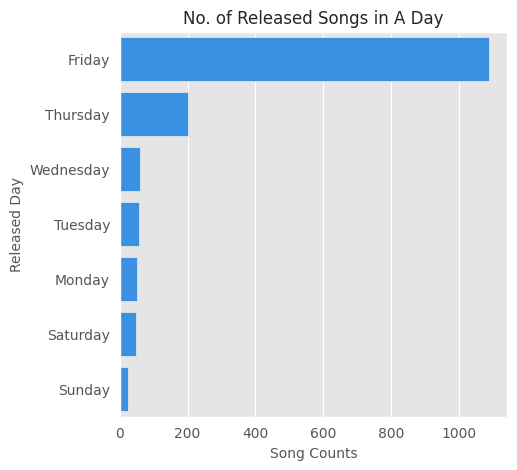

In [225]:
# Create a bar plot
plt.figure(figsize=(5,5))
ax = sns.barplot(data=count_days, y="Release Date", x="count", color='dodgerblue')
sns.set_style('white')
plt.xlabel('Song Counts', fontsize=10)
plt.ylabel('Released Day', fontsize=10)
plt.title('No. of Released Songs in A Day', fontsize=12)
plt.show();
# Set the style to 'white' to remove the gray background and grid lines


In [226]:
# Extract the year from ['Release Date'] column and create a new column named ['ReleaseYear']
music_type1_1['ReleaseYear'] = music_type1_1['Release Date'].dt.year
music_type1_1

# To extract the year as a string
#music_type1_2['ReleaseYear'] = music_type1_2['Release Date'].dt.atrftime('%Y')

,Song Name,Streams,Artist,Artist Followers,Popularity,Release Date,ReleaseDay,ReleaseYear
0,Beggin',48633449,Måneskin,3377762.0,100.0,2017-12-08,Friday,2017.0
1,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,99.0,2021-07-09,Friday,2021.0
2,good 4 u,40162559,Olivia Rodrigo,6266514.0,99.0,2021-05-21,Friday,2021.0
3,Bad Habits,37799456,Ed Sheeran,83293380.0,98.0,2021-06-25,Friday,2021.0
4,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,96.0,2021-07-23,Friday,2021.0
...,...,...,...,...,...,...,...,...
1551,New Rules,4630675,Dua Lipa,27167675.0,79.0,2017-06-02,Friday,2017.0
1552,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,66.0,2019-10-11,Friday,2019.0
1553,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,81.0,2018-01-12,Friday,2018.0
1554,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,60.0,2019-09-25,Wednesday,2019.0


In [227]:
# Sum number of nulls in each columns
music_type1_1.isnull().sum()

,0
Song Name,0
Streams,0
Artist,0
Artist Followers,11
Popularity,11
Release Date,28
ReleaseDay,28
ReleaseYear,28


In [228]:
# Drop NaNs
music_type1_1_cleaned_temp = music_type1_1.dropna(axis= 0, inplace= False)
music_type1_1_cleaned_temp

,Song Name,Streams,Artist,Artist Followers,Popularity,Release Date,ReleaseDay,ReleaseYear
0,Beggin',48633449,Måneskin,3377762.0,100.0,2017-12-08,Friday,2017.0
1,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,99.0,2021-07-09,Friday,2021.0
2,good 4 u,40162559,Olivia Rodrigo,6266514.0,99.0,2021-05-21,Friday,2021.0
3,Bad Habits,37799456,Ed Sheeran,83293380.0,98.0,2021-06-25,Friday,2021.0
4,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,96.0,2021-07-23,Friday,2021.0
...,...,...,...,...,...,...,...,...
1551,New Rules,4630675,Dua Lipa,27167675.0,79.0,2017-06-02,Friday,2017.0
1552,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,66.0,2019-10-11,Friday,2019.0
1553,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,81.0,2018-01-12,Friday,2018.0
1554,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,60.0,2019-09-25,Wednesday,2019.0


In [229]:
# Drop unused columns
music_type1_1_cleaned = music_type1_1_cleaned_temp.drop(['Song Name', 'Artist', 'Release Date'],  axis = 1, inplace = False)
music_type1_1_cleaned

,Streams,Artist Followers,Popularity,ReleaseDay,ReleaseYear
0,48633449,3377762.0,100.0,Friday,2017.0
1,47248719,2230022.0,99.0,Friday,2021.0
2,40162559,6266514.0,99.0,Friday,2021.0
3,37799456,83293380.0,98.0,Friday,2021.0
4,33948454,5473565.0,96.0,Friday,2021.0
...,...,...,...,...,...
1551,4630675,27167675.0,79.0,Friday,2017.0
1552,4623030,15019109.0,66.0,Friday,2019.0
1553,4620876,22698747.0,81.0,Friday,2018.0
1554,4607385,208630.0,60.0,Wednesday,2019.0


In [230]:
music_type1_1_cleaned.isnull().sum()

,0
Streams,0
Artist Followers,0
Popularity,0
ReleaseDay,0
ReleaseYear,0


In [231]:
music_type1_1_cleaned.dtypes

,0
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseDay,object
ReleaseYear,float64


In [232]:
# Make a copy of the dataframe before performing the datatype conversion
music_type1_1_converted = music_type1_1_cleaned.copy()

In [233]:
# Define the mapping dictionary
# Customize the numerical values
releaseday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
music_type1_1_converted['ReleaseDay_Numeric'] = music_type1_1_converted['ReleaseDay'].map(releaseday_mapping)

print("\nDataFrame after converting 'ReleaseDay' to numeric:")
print(music_type1_1_converted)


DataFrame after converting 'ReleaseDay' to numeric:
       Streams  Artist Followers  Popularity ReleaseDay  ReleaseYear  \
0     48633449         3377762.0       100.0     Friday       2017.0   
1     47248719         2230022.0        99.0     Friday       2021.0   
2     40162559         6266514.0        99.0     Friday       2021.0   
3     37799456        83293380.0        98.0     Friday       2021.0   
4     33948454         5473565.0        96.0     Friday       2021.0   
...        ...               ...         ...        ...          ...   
1551   4630675        27167675.0        79.0     Friday       2017.0   
1552   4623030        15019109.0        66.0     Friday       2019.0   
1553   4620876        22698747.0        81.0     Friday       2018.0   
1554   4607385          208630.0        60.0  Wednesday       2019.0   
1555   4595450        42227614.0        70.0  Wednesday       2019.0   

      ReleaseDay_Numeric  
0                      5  
1                      5  
2

In [234]:
# To rename 'ReleaseDay_Numeric' with 'ReleaseDay' as previously named
music_type1_1_numeric = music_type1_1_converted.drop(columns = ['ReleaseDay']).rename( columns = { 'ReleaseDay_Numeric' : 'ReleaseDay' })
music_type1_1_numeric

,Streams,Artist Followers,Popularity,ReleaseYear,ReleaseDay
0,48633449,3377762.0,100.0,2017.0,5
1,47248719,2230022.0,99.0,2021.0,5
2,40162559,6266514.0,99.0,2021.0,5
3,37799456,83293380.0,98.0,2021.0,5
4,33948454,5473565.0,96.0,2021.0,5
...,...,...,...,...,...
1551,4630675,27167675.0,79.0,2017.0,5
1552,4623030,15019109.0,66.0,2019.0,5
1553,4620876,22698747.0,81.0,2018.0,5
1554,4607385,208630.0,60.0,2019.0,3


In [235]:
#check the number of nulls in each column
music_type1_1_numeric.isnull().sum()

,0
Streams,0
Artist Followers,0
Popularity,0
ReleaseYear,0
ReleaseDay,0


In [236]:
#check data type of each column
music_type1_1_numeric.dtypes

,0
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseYear,float64
ReleaseDay,int64


# EDA Set 1

## Observation of Features Correlation: Set 1

In [237]:
#Sort the DataFrame by 'ReleaseYear' in descending order
music_type1_1_cleaned_sorted = music_type1_1_cleaned_temp.sort_values(by='ReleaseYear',ascending=False)

# Set to False for descending order

In [238]:
# Interactive scatter Plot
fig = px.scatter(
    music_type1_1_cleaned_sorted,
    x="Artist Followers",
    y="Popularity",
    size="Streams",
    color="Artist",
    hover_data='ReleaseDay',
    animation_frame="ReleaseYear",
    hover_name="Song Name",
    log_x=True,
    size_max=60
    )
#
fig.update_yaxes(range=[0, 120])
fig.show();
#fig.write_html("gpminder.html")

# fig.write_image("gapminder.svg")

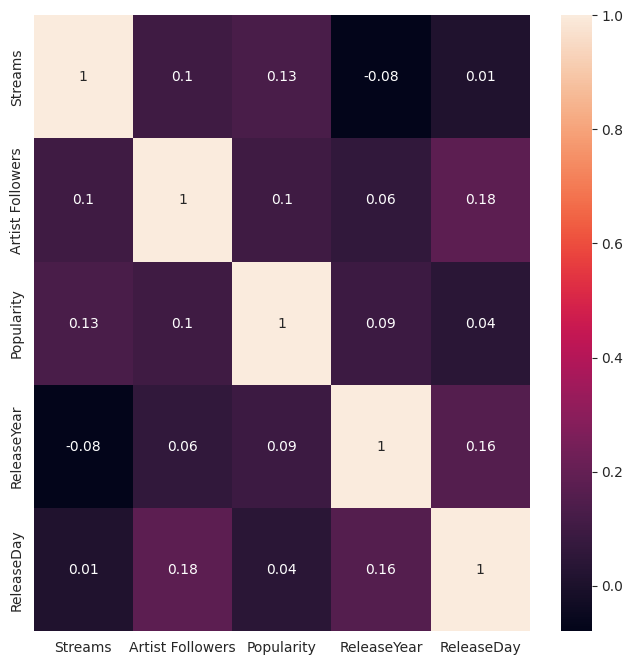

In [239]:
# Checking correlations between predictors (variables after cleaning)
plt.figure(figsize=(8,8))
correlation_matrix = music_type1_1_numeric.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Processing Set 1

In [240]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Set 1.1


In [241]:
X = music_type1_1_numeric.drop(['Popularity'], axis = 1)
y = music_type1_1_numeric['Popularity']


- To choose max_depths from the run test below

In [242]:
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std( ddof = 1 )

In [243]:
pd.DataFrame( zip( max_depths, rms_depth, std_depth ) )

,0,1,2
0,1,15.225994,1.079260
1,2,10.413869,1.129890
2,3,9.021191,0.747700
3,4,8.688670,0.707689
4,5,8.654609,0.700637
5,6,8.613598,0.672453
6,7,8.726199,0.819200
7,8,8.938603,0.792301
8,9,9.092140,0.755634
9,10,9.301292,0.845936


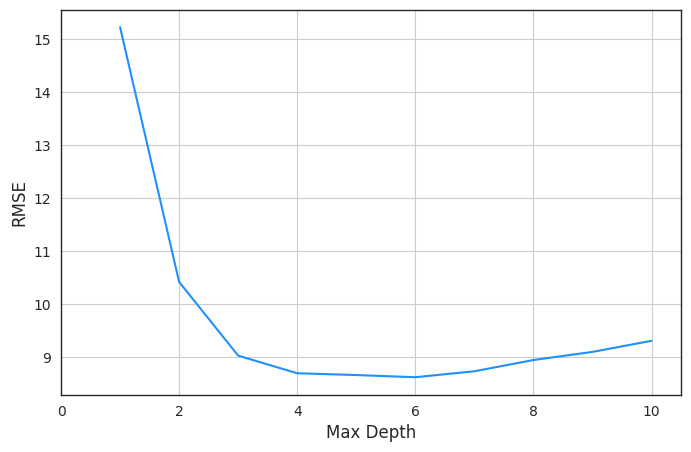

In [244]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [245]:
# Re run with max depth = 5
numLoops = 500

rms_error = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
  model = DecisionTreeRegressor( max_depth=5 )
  model.fit( X_train, y_train )
  y_pred = model.predict( X_test )
  rms_error[idx] = np.sqrt( mean_squared_error( y_test, y_pred ) )

print(f"CV RMSE: {rms_error.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error.std():.2f}")


CV RMSE: 8.65
Standard Deviation of RMSE: 0.74


## Set 1.2

In [246]:
X2 = music_type1_1_numeric.drop(['Popularity', 'ReleaseDay'], axis = 1) # ReleaseDay column was excluded in this model training version
y2 = music_type1_1_numeric['Popularity']


In [247]:
# Run to choose max_depths
max_depths2 = [1,2,3,4,5,6,7,8,9,10]
rms_depth2 = np.zeros(len(max_depths))
std_depth2 = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error2 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2)
    model2 = DecisionTreeRegressor(max_depth=depth)
    model2.fit(X2_train,y2_train)
    y2_pred = model2.predict(X2_test)
    rms_error2[idx] = np.sqrt(mean_squared_error(y2_test, y2_pred))

  rms_depth2[n] = rms_error2.mean()
  std_depth2[n] = rms_error2.std( ddof = 1 )

In [248]:
pd.DataFrame( zip( max_depths2, rms_depth2, std_depth2 ) )

,0,1,2
0,1,15.267666,1.046812
1,2,10.390961,1.102193
2,3,9.012229,0.688342
3,4,8.664513,0.681145
4,5,8.651182,0.712121
5,6,8.692067,0.715196
6,7,8.757215,0.740294
7,8,8.894857,0.754323
8,9,9.122418,0.811295
9,10,9.311098,0.783737


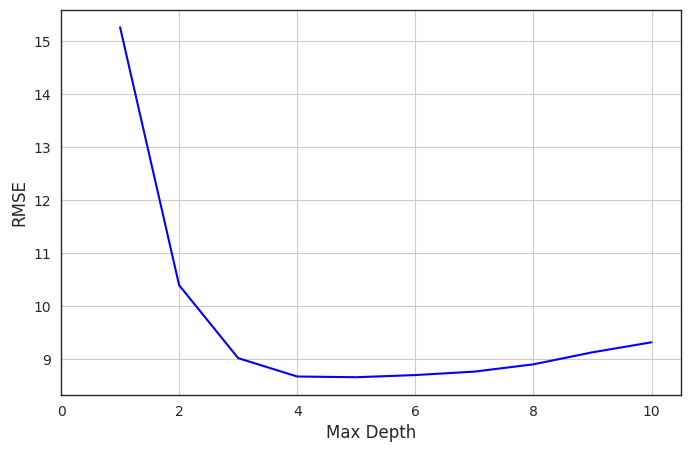

In [249]:
# Plot result -- Set 2
plt.figure(figsize = (8,5))
plt.plot(max_depths2, rms_depth2, color='blue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [250]:
# Choose max_depth = 4
# Re run with max depth = 4
numLoops = 500

rms_error2 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2 )
  model2 = DecisionTreeRegressor( max_depth=4 )
  model2.fit( X2_train, y2_train )
  y2_pred = model2.predict( X2_test )
  rms_error2[idx] = np.sqrt( mean_squared_error( y2_test, y2_pred ) )

print(f"CV RMSE: {rms_error2.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error2.std():.2f}")

CV RMSE: 8.66
Standard Deviation of RMSE: 0.64


## Set 1.3

In [251]:
X3 = music_type1_1_numeric.drop(['Popularity','ReleaseYear'], axis = 1) # ReleaseDay and ReleaseYear columns were excluded in this model training version
y3 = music_type1_1_numeric['Popularity']


In [252]:
# Run to choose max_depths
max_depths3 = [1,2,3,4,5,6,7,8,9,10]
rms_depth3 = np.zeros(len(max_depths))
std_depth3 = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error3 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2)
    model3 = DecisionTreeRegressor(max_depth=depth)
    model3.fit(X3_train,y3_train)
    y3_pred = model3.predict(X3_test)
    rms_error3[idx] = np.sqrt(mean_squared_error(y3_test, y3_pred))

  rms_depth3[n] = rms_error3.mean()
  std_depth3[n] = rms_error3.std( ddof = 1 )

In [253]:
pd.DataFrame( zip( max_depths3, rms_depth3, std_depth3 ) )

,0,1,2
0,1,15.330350,1.062670
1,2,10.562984,1.026546
2,3,10.438794,0.739138
3,4,10.511101,0.894802
4,5,10.713238,0.929444
5,6,10.964851,0.920042
6,7,11.261085,0.958544
7,8,11.463479,0.942687
8,9,11.696991,0.967139
9,10,11.944684,0.974193


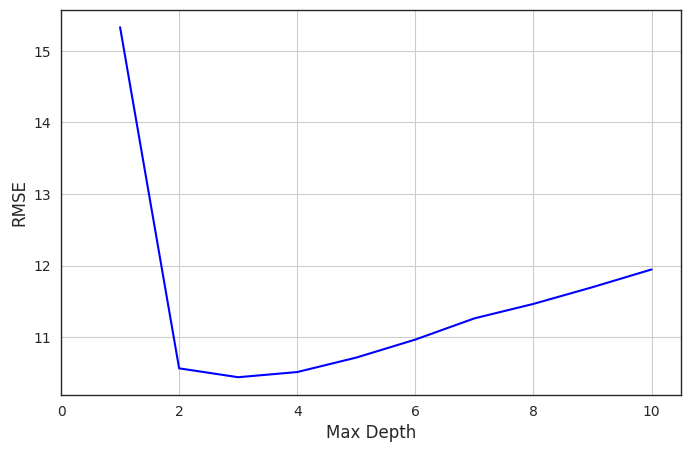

In [254]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths3, rms_depth3, color='blue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [255]:
# Choose max_depth = 3
# Re run with max depth = 3
numLoops = 500

rms_error3 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X3_train, X3_test, y3_train, y3_test = train_test_split( X3, y3, test_size=0.2 )
  model3 = DecisionTreeRegressor( max_depth=3 )
  model3.fit( X3_train, y3_train )
  y3_pred = model3.predict( X3_test )
  rms_error3[idx] = np.sqrt( mean_squared_error( y3_test, y3_pred ) )

print(f"CV RMSE: {rms_error3.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error3.std():.2f}")

CV RMSE: 10.41
Standard Deviation of RMSE: 0.72


# Data Visualization Set 1:

## Decision Trees

In [256]:
import graphviz
from IPython.display import display
from sklearn import tree


## Set 1.1--Tree

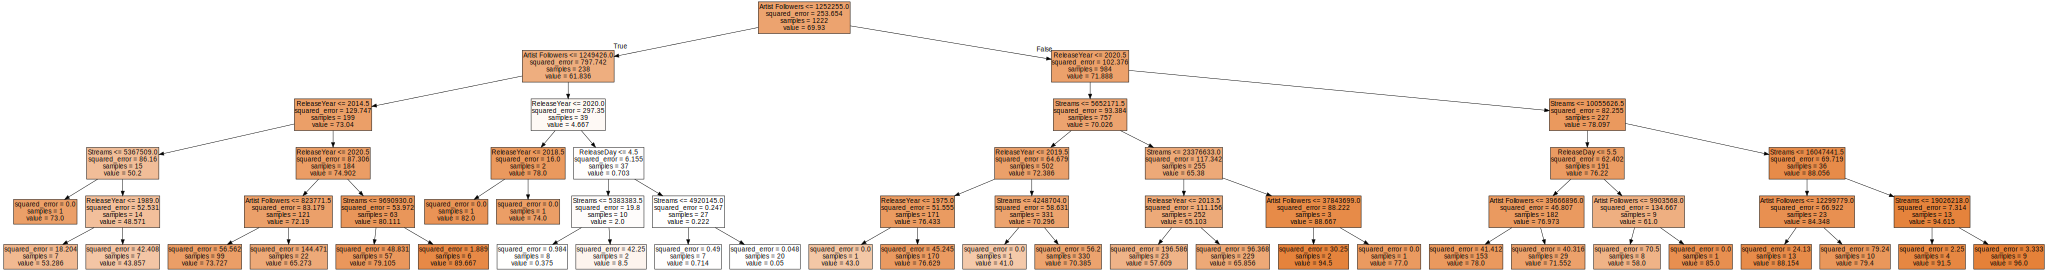

In [257]:
# Option 1
display(
  graphviz.Source(
    tree.export_graphviz(
      model,
      feature_names = X.columns,
      filled = True,
    )
  )
)


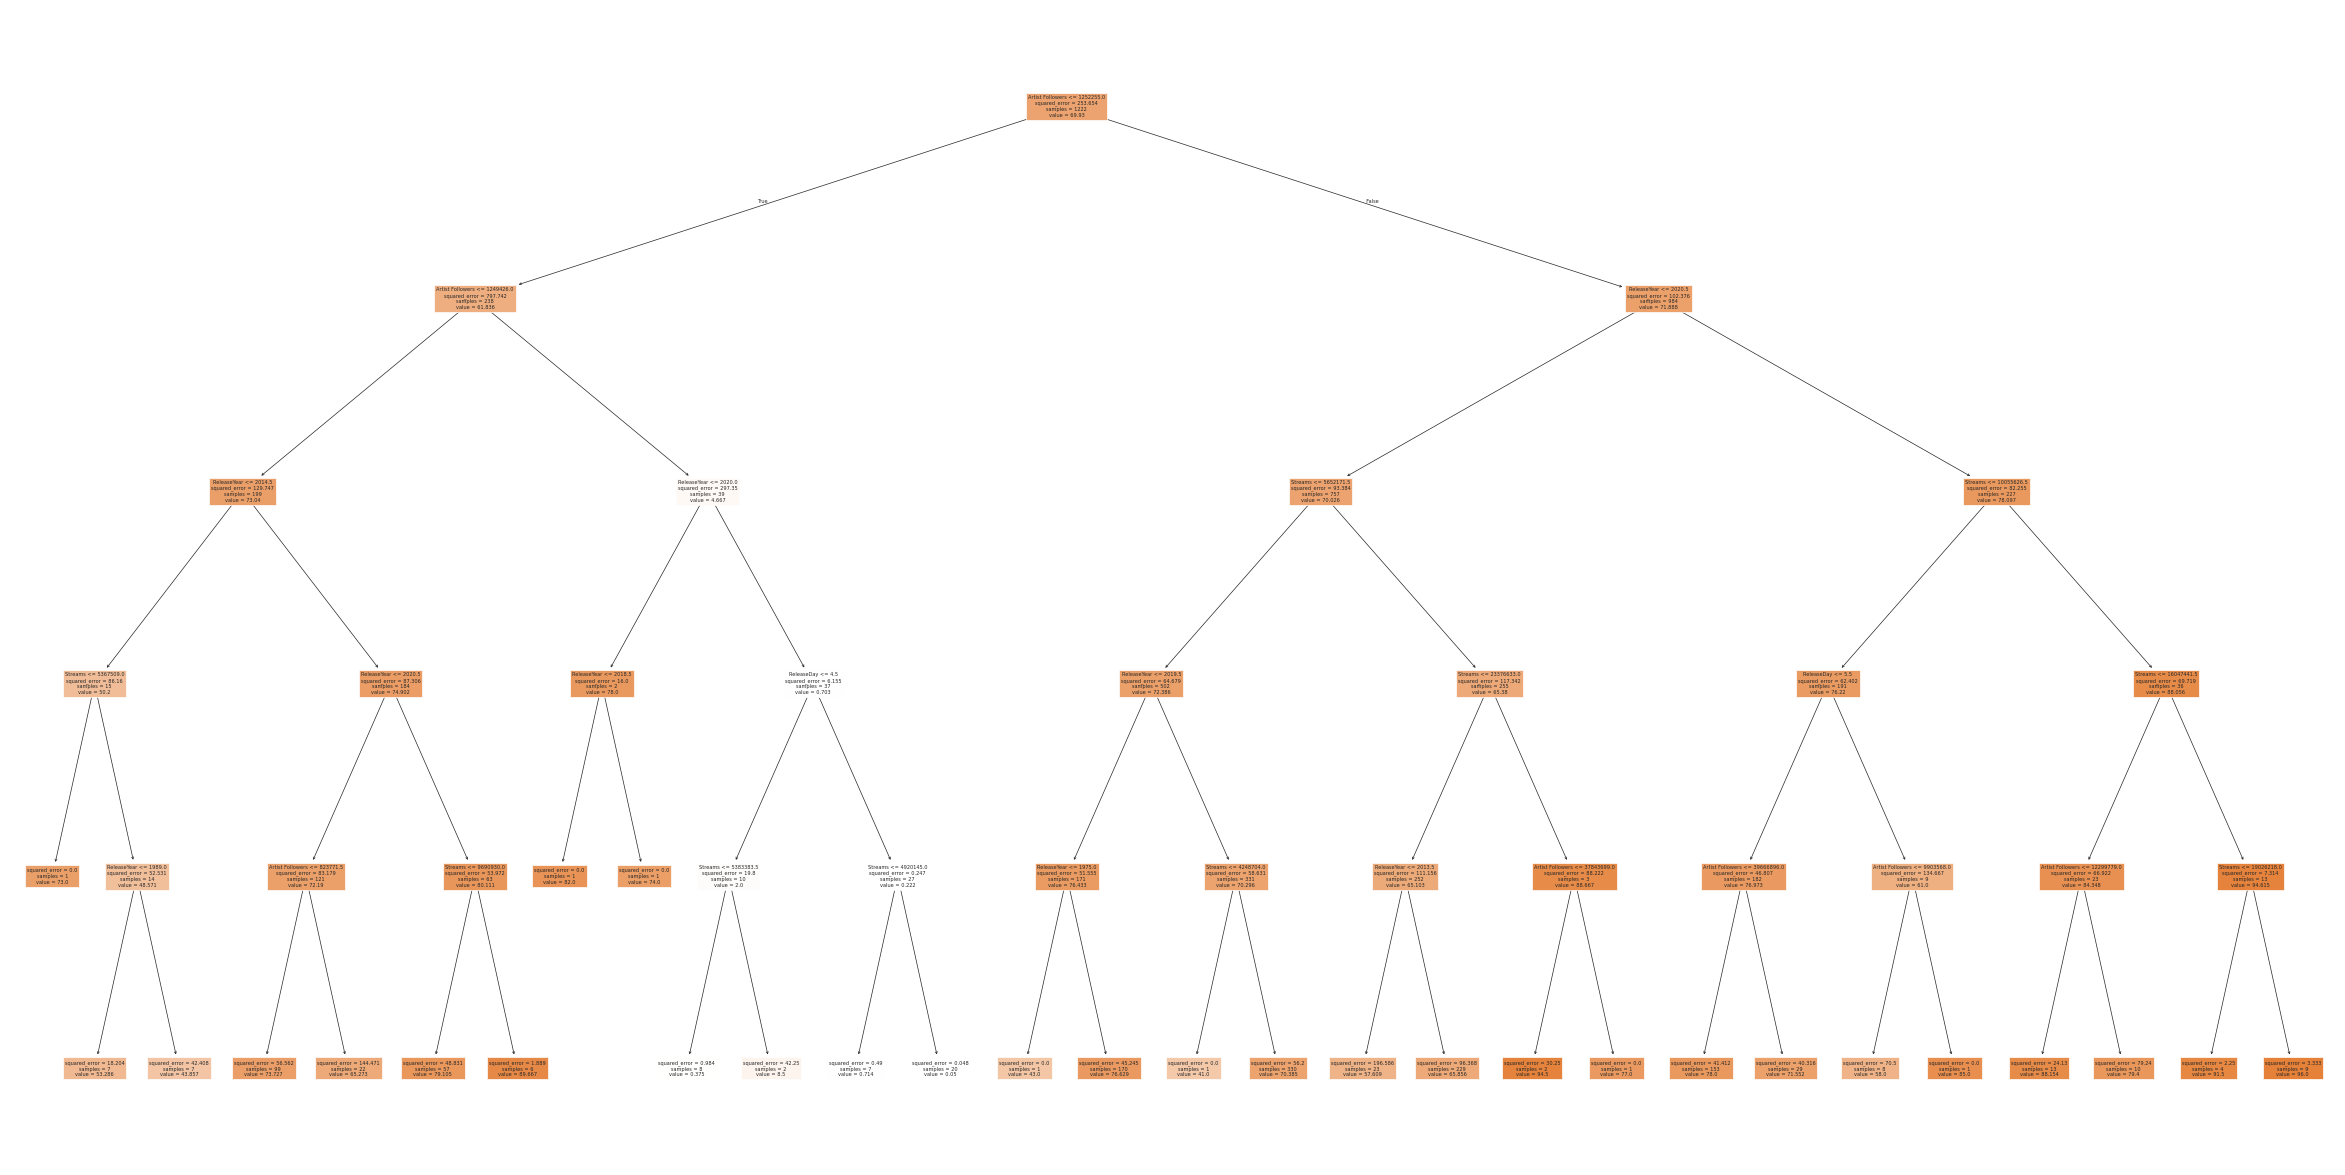

In [258]:
# Option 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model,
  feature_names = X.columns,
  filled=True,
)


## Set 1.2--Tree

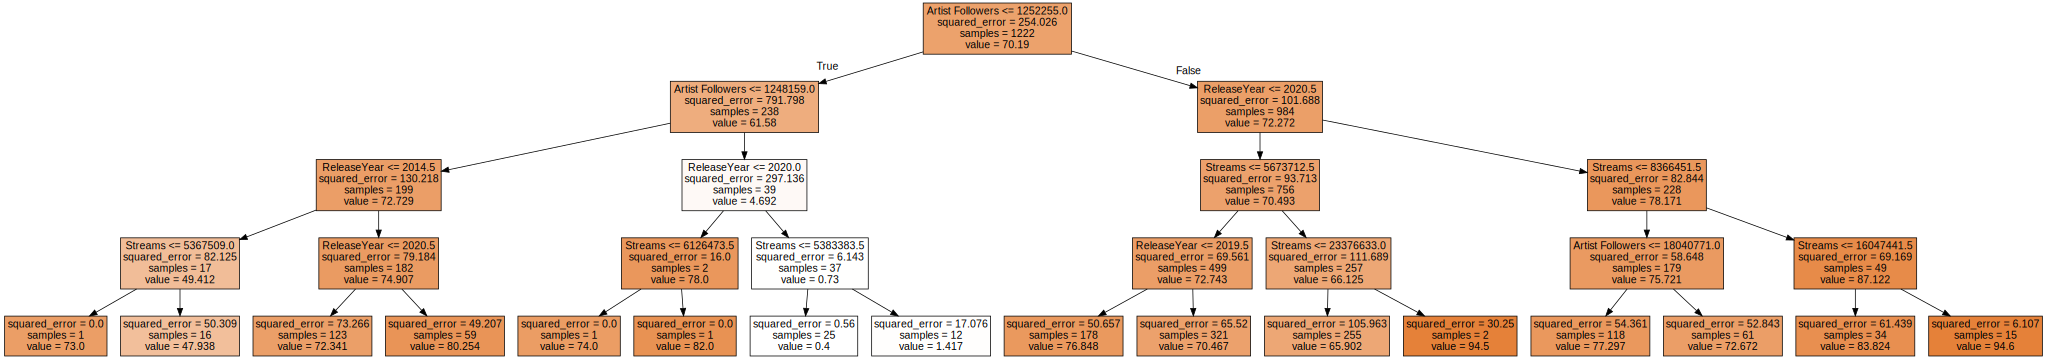

In [259]:
# Option 1-set 2
display(
  graphviz.Source(
    tree.export_graphviz(
      model2,
      feature_names = X2.columns,
      filled = True,
    )
  )
)


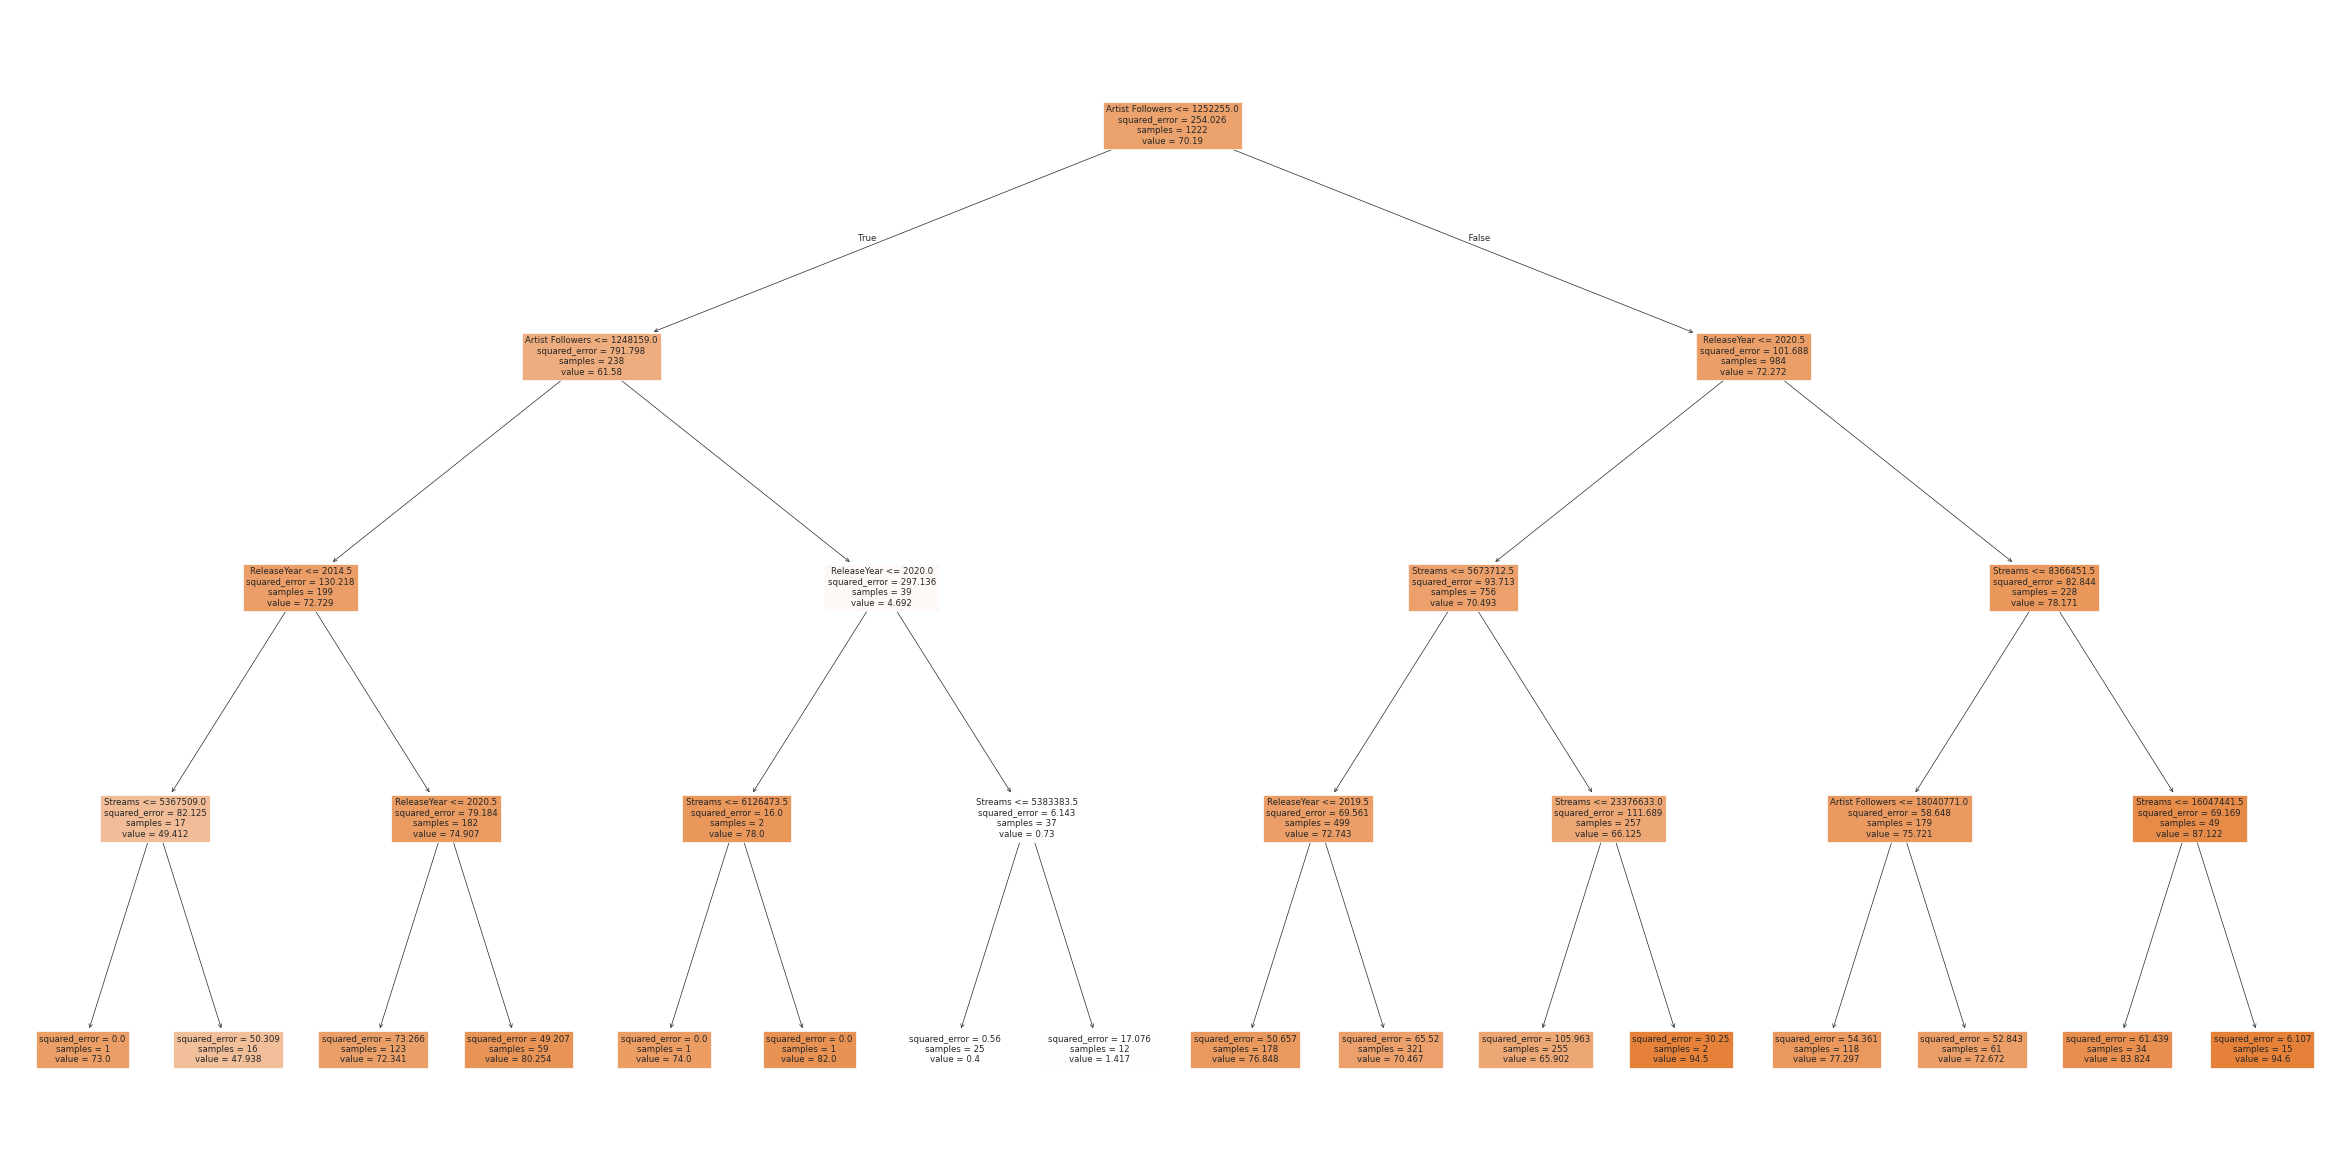

In [260]:
# Option 2-Set 2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model2,
  feature_names = X2.columns,
  filled=True,
)


## Set 1.3--Tree

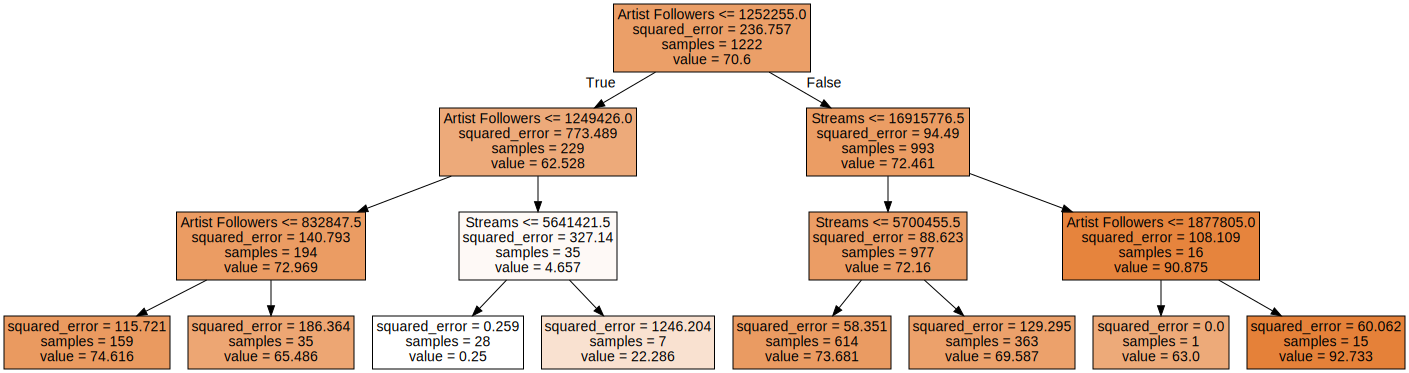

In [261]:
# Option 1--Set 3
display(
  graphviz.Source(
    tree.export_graphviz(
      model3,
      feature_names = X3.columns,
      filled = True,
    )
  )
)

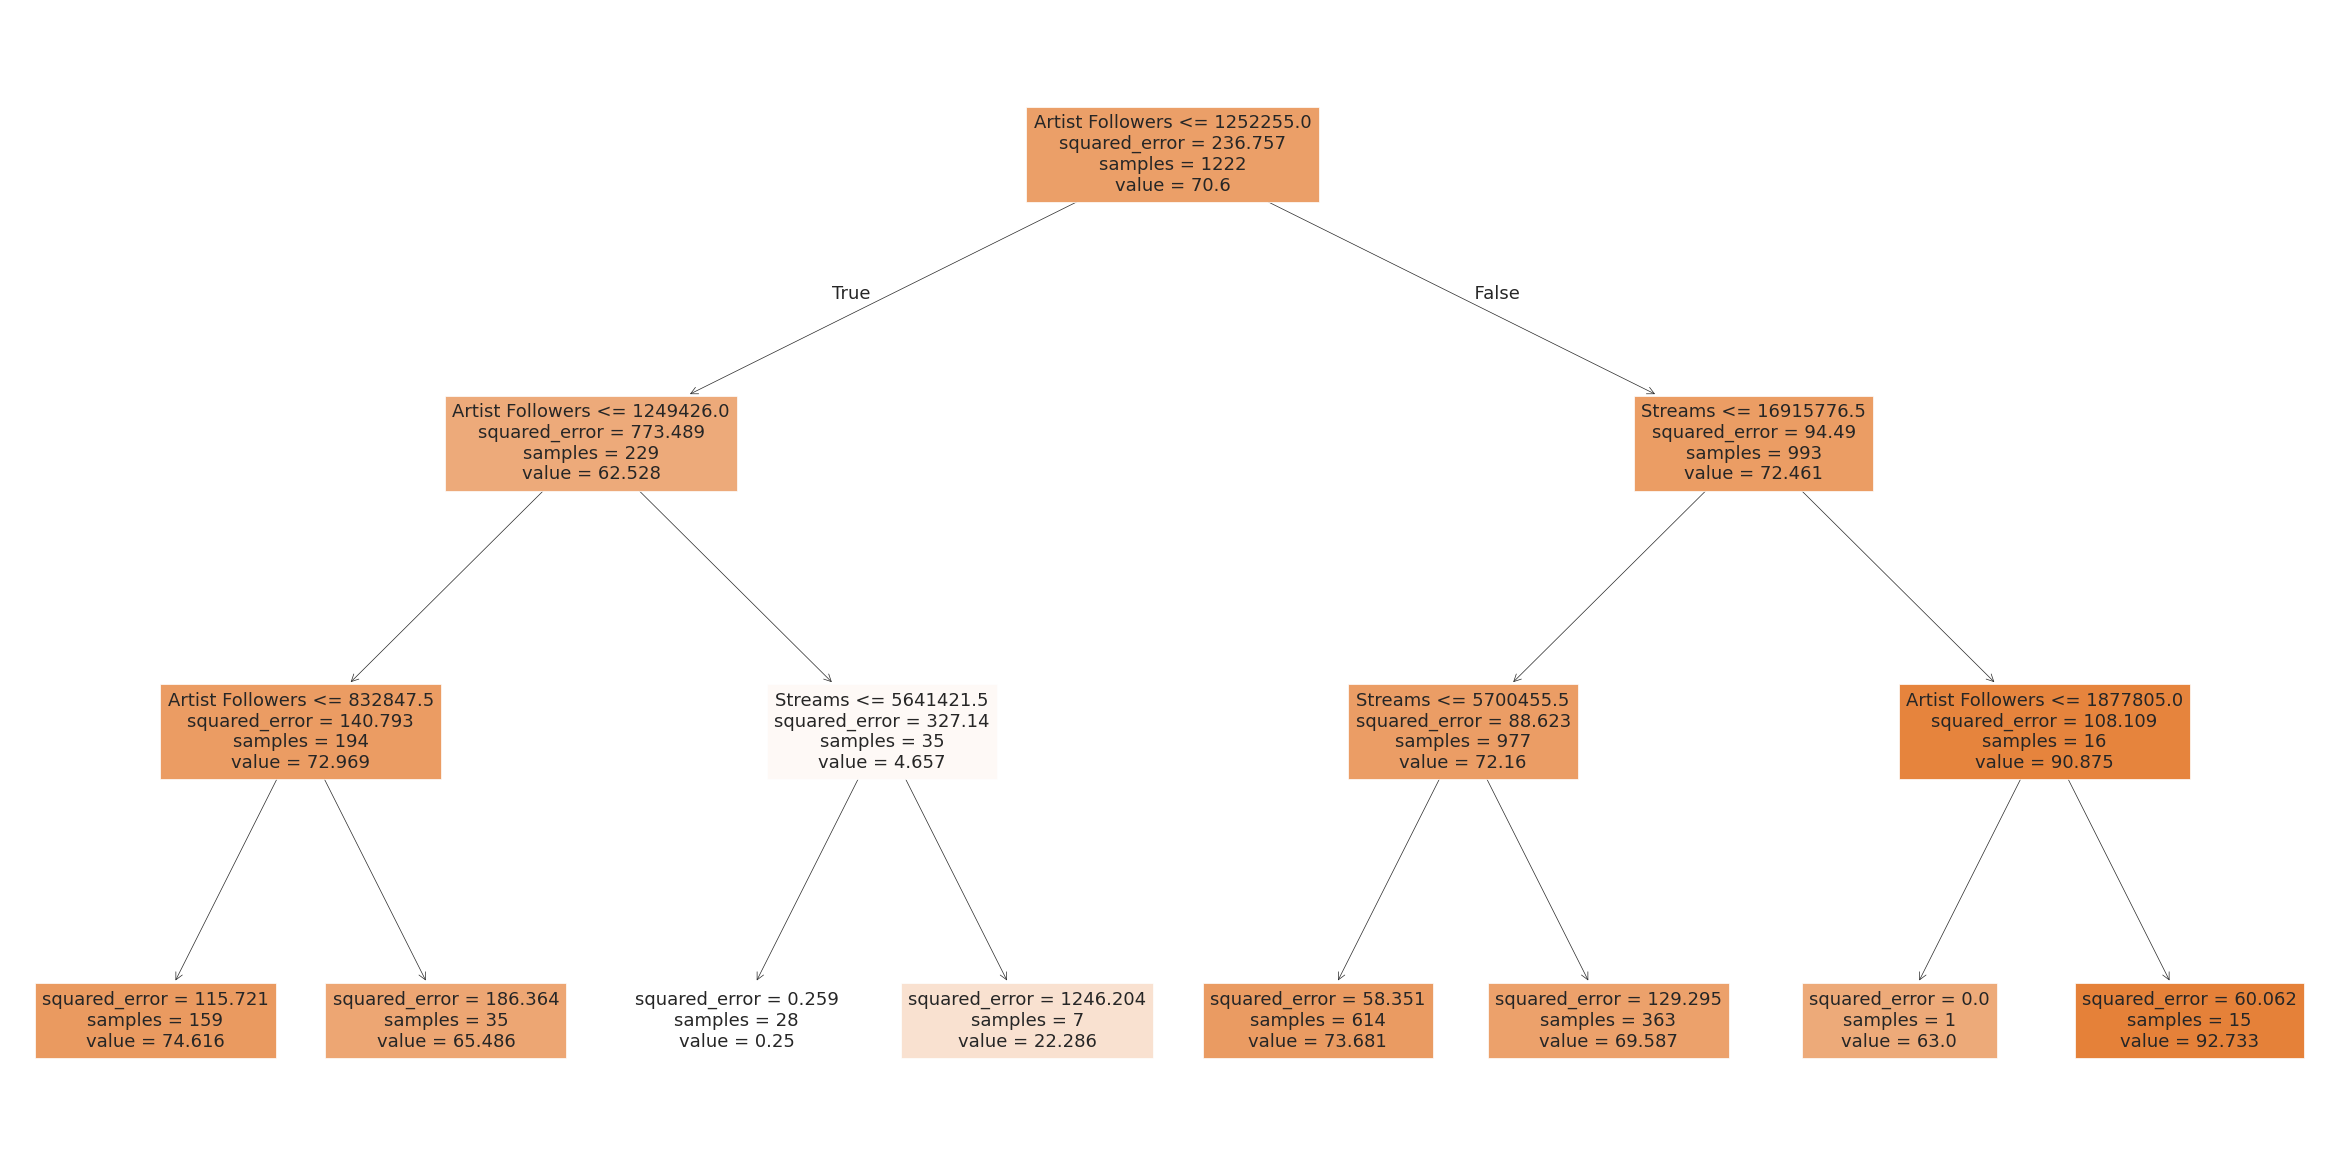

In [262]:
# Option 2--Set 3
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model3,
  feature_names = X3.columns,
  filled=True,
)


# Data Cleaning Set 2

In [263]:
music_cleaned_2 = music_test1.drop(['Index', 'Song ID', 'Chord'], axis = 1, inplace = False)
music_cleaned_2

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881


In [264]:
# 1. Create a new dataframe set 2
music_set2 = music_cleaned[['Highest Charting Position','Number of Times Charted','Streams','Artist Followers','Popularity','Release Date']]
music_set2

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date
0,1,8,"48,633,449",3377762,100,2017-12-08
1,2,3,"47,248,719",2230022,99,2021-07-09
2,1,11,"40,162,559",6266514,99,2021-05-21
3,3,5,"37,799,456",83293380,98,2021-06-25
4,5,1,"33,948,454",5473565,96,2021-07-23
...,...,...,...,...,...,...
1551,195,1,"4,630,675",27167675,79,2017-06-02
1552,196,1,"4,623,030",15019109,66,2019-10-11
1553,197,1,"4,620,876",22698747,81,2018-01-12
1554,198,1,"4,607,385",208630,60,2019-09-25


In [265]:
music_set2.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,object
Artist Followers,object
Popularity,object
Release Date,datetime64[ns]


In [266]:
# Make a copy of the dataframe
music_type2 = music_set2.copy()

In [267]:
# 2. Change this column to datetime
for i in ['Release Date']:
  music_type2['Release Date'] = pd.to_datetime(music_type2['Release Date'], errors = 'coerce')

music_type2['Release Date'].head()

,Release Date
0,2017-12-08
1,2021-07-09
2,2021-05-21
3,2021-06-25
4,2021-07-23


In [268]:
# 3. Convert to string first to use string methods, then remove commas
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type2[col] = music_type2[col].astype(str).str.replace(',', '', regex=False).str.strip()

In [269]:
# 4. Then, convert string to integer
for col in ['Streams','Artist Followers', 'Popularity']:
    music_type2[col] = music_type2[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type2[col] = pd.to_numeric(music_type2[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type2.dtypes)
print("\nConverted DataFrame:")
print(music_type2)


Converted Data Types:
Highest Charting Position             int64
Number of Times Charted               int64
Streams                               int64
Artist Followers                    float64
Popularity                          float64
Release Date                 datetime64[ns]
dtype: object

Converted DataFrame:
      Highest Charting Position  Number of Times Charted   Streams  \
0                             1                        8  48633449   
1                             2                        3  47248719   
2                             1                       11  40162559   
3                             3                        5  37799456   
4                             5                        1  33948454   
...                         ...                      ...       ...   
1551                        195                        1   4630675   
1552                        196                        1   4623030   
1553                        197                

In [270]:
# Extract the day from the 'Release Date' object and create a new column named ['ReleaseDay']
music_type2['ReleaseDay'] = music_type2['Release Date'].dt.day_name()
music_type2

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date,ReleaseDay
0,1,8,48633449,3377762.0,100.0,2017-12-08,Friday
1,2,3,47248719,2230022.0,99.0,2021-07-09,Friday
2,1,11,40162559,6266514.0,99.0,2021-05-21,Friday
3,3,5,37799456,83293380.0,98.0,2021-06-25,Friday
4,5,1,33948454,5473565.0,96.0,2021-07-23,Friday
...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,79.0,2017-06-02,Friday
1552,196,1,4623030,15019109.0,66.0,2019-10-11,Friday
1553,197,1,4620876,22698747.0,81.0,2018-01-12,Friday
1554,198,1,4607385,208630.0,60.0,2019-09-25,Wednesday


In [271]:
# Extract the year from ['Release Date'] column and create a new column named ['ReleaseYear']
music_type2['ReleaseYear'] = music_type2['Release Date'].dt.year
music_type2

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Release Date,ReleaseDay,ReleaseYear
0,1,8,48633449,3377762.0,100.0,2017-12-08,Friday,2017.0
1,2,3,47248719,2230022.0,99.0,2021-07-09,Friday,2021.0
2,1,11,40162559,6266514.0,99.0,2021-05-21,Friday,2021.0
3,3,5,37799456,83293380.0,98.0,2021-06-25,Friday,2021.0
4,5,1,33948454,5473565.0,96.0,2021-07-23,Friday,2021.0
...,...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,79.0,2017-06-02,Friday,2017.0
1552,196,1,4623030,15019109.0,66.0,2019-10-11,Friday,2019.0
1553,197,1,4620876,22698747.0,81.0,2018-01-12,Friday,2018.0
1554,198,1,4607385,208630.0,60.0,2019-09-25,Wednesday,2019.0


In [272]:
music_type2_cleaned_temp = music_type2.drop(['Release Date'], axis = 1, inplace = False)
music_type2_cleaned_temp

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseDay,ReleaseYear
0,1,8,48633449,3377762.0,100.0,Friday,2017.0
1,2,3,47248719,2230022.0,99.0,Friday,2021.0
2,1,11,40162559,6266514.0,99.0,Friday,2021.0
3,3,5,37799456,83293380.0,98.0,Friday,2021.0
4,5,1,33948454,5473565.0,96.0,Friday,2021.0
...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,79.0,Friday,2017.0
1552,196,1,4623030,15019109.0,66.0,Friday,2019.0
1553,197,1,4620876,22698747.0,81.0,Friday,2018.0
1554,198,1,4607385,208630.0,60.0,Wednesday,2019.0


In [273]:
music_type2_cleaned_temp.isnull().sum()

,0
Highest Charting Position,0
Number of Times Charted,0
Streams,0
Artist Followers,11
Popularity,11
ReleaseDay,28
ReleaseYear,28


In [274]:
music_type2_cleaned = music_type2_cleaned_temp.dropna(axis= 0, inplace= False)
music_type2_cleaned

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseDay,ReleaseYear
0,1,8,48633449,3377762.0,100.0,Friday,2017.0
1,2,3,47248719,2230022.0,99.0,Friday,2021.0
2,1,11,40162559,6266514.0,99.0,Friday,2021.0
3,3,5,37799456,83293380.0,98.0,Friday,2021.0
4,5,1,33948454,5473565.0,96.0,Friday,2021.0
...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,79.0,Friday,2017.0
1552,196,1,4623030,15019109.0,66.0,Friday,2019.0
1553,197,1,4620876,22698747.0,81.0,Friday,2018.0
1554,198,1,4607385,208630.0,60.0,Wednesday,2019.0


In [275]:
music_type2_cleaned.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseDay,object
ReleaseYear,float64


In [276]:
# Make a copy of the dataframe before performing the datatype conversion
music_type2_converted = music_type2_cleaned.copy()

In [277]:
# Define the mapping dictionary
# Customize the numerical values
releaseday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
music_type2_converted['ReleaseDay_Numeric'] = music_type2_converted['ReleaseDay'].map(releaseday_mapping)

print("\nDataFrame after converting 'ReleaseDay' to numeric:")
print(music_type2_converted)


DataFrame after converting 'ReleaseDay' to numeric:
      Highest Charting Position  Number of Times Charted   Streams  \
0                             1                        8  48633449   
1                             2                        3  47248719   
2                             1                       11  40162559   
3                             3                        5  37799456   
4                             5                        1  33948454   
...                         ...                      ...       ...   
1551                        195                        1   4630675   
1552                        196                        1   4623030   
1553                        197                        1   4620876   
1554                        198                        1   4607385   
1555                        199                        1   4595450   

      Artist Followers  Popularity ReleaseDay  ReleaseYear  ReleaseDay_Numeric  
0            3377762.0   

In [278]:
# To rename 'ReleaseDay_Numeric' with 'ReleaseDay' as previously named
music_type2_numeric = music_type2_converted.drop(columns = ['ReleaseDay']).rename( columns = { 'ReleaseDay_Numeric' : 'ReleaseDay' })
music_type2_numeric

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,ReleaseYear,ReleaseDay
0,1,8,48633449,3377762.0,100.0,2017.0,5
1,2,3,47248719,2230022.0,99.0,2021.0,5
2,1,11,40162559,6266514.0,99.0,2021.0,5
3,3,5,37799456,83293380.0,98.0,2021.0,5
4,5,1,33948454,5473565.0,96.0,2021.0,5
...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,79.0,2017.0,5
1552,196,1,4623030,15019109.0,66.0,2019.0,5
1553,197,1,4620876,22698747.0,81.0,2018.0,5
1554,198,1,4607385,208630.0,60.0,2019.0,3


In [279]:
music_type2_numeric.dtypes

,0
Highest Charting Position,int64
Number of Times Charted,int64
Streams,int64
Artist Followers,float64
Popularity,float64
ReleaseYear,float64
ReleaseDay,int64


# EDA Set 2

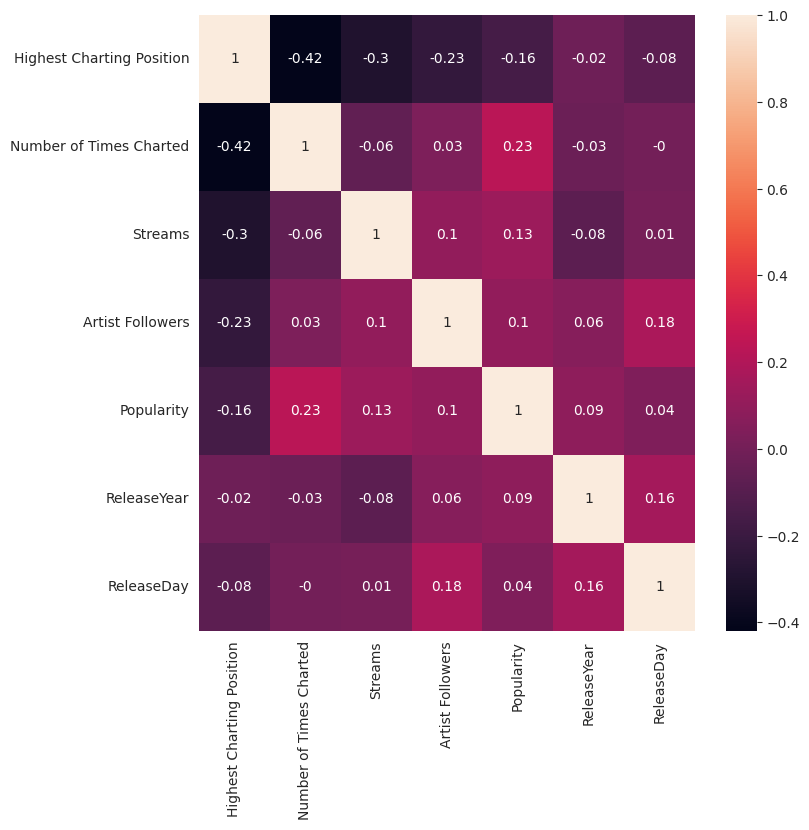

In [280]:
# Checking correlations between predictors (variables after cleaning)
plt.figure(figsize=(8,8))
correlation_matrix = music_type2_numeric.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Processing Set 2

## Set 2.1

In [281]:
X4 = music_type2_numeric.drop(['Popularity'], axis = 1)
y4 = music_type2_numeric['Popularity']


In [ ]:
max_depths4 = [1,2,3,4,5,6,7,8,9,10]
rms_depth4 = np.zeros(len(max_depths))
std_depth4 = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error4 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2)
    model4 = DecisionTreeRegressor(max_depth=depth)
    model4.fit(X4_train,y4_train)
    y4_pred = model4.predict(X4_test)
    rms_error4[idx] = np.sqrt(mean_squared_error(y4_test, y4_pred))

  rms_depth4[n] = rms_error4.mean()
  std_depth4[n] = rms_error4.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths4, rms_depth4, std_depth4 ) )

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths4, rms_depth4, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
# Re run with max depth = 7
numLoops = 500

rms_error4 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X4_train, X4_test, y4_train, y4_test = train_test_split( X4, y4, test_size=0.2 )
  model4 = DecisionTreeRegressor( max_depth=7 )
  model4.fit( X4_train, y4_train )
  y4_pred = model4.predict( X4_test )
  rms_error4[idx] = np.sqrt( mean_squared_error( y4_test, y4_pred ) )

print(f"CV RMSE: {rms_error4.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error4.std():.2f}")


## Set 2.2

In [ ]:
X5 = music_type2_numeric.drop(['Popularity','ReleaseDay','Highest Charting Position','Number of Times Charted'], axis = 1)
y5 = music_type2_numeric['Popularity']


In [ ]:
max_depths5 = [1,2,3,4,5,6,7,8,9,10]
rms_depth5 = np.zeros(len(max_depths))
std_depth5 = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error5 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.2)
    model5 = DecisionTreeRegressor(max_depth=depth)
    model5.fit(X5_train,y5_train)
    y5_pred = model5.predict(X5_test)
    rms_error5[idx] = np.sqrt(mean_squared_error(y5_test, y5_pred))

  rms_depth5[n] = rms_error5.mean()
  std_depth5[n] = rms_error5.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths5, rms_depth5, std_depth5 ) )

In [ ]:
# Plot result--Set 2.2
plt.figure(figsize = (8,5))
plt.plot(max_depths5, rms_depth5, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
# Re run with max depth = 5
numLoops = 500

rms_error5 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X5_train, X5_test, y5_train, y5_test = train_test_split( X5, y5, test_size=0.2 )
  model5 = DecisionTreeRegressor( max_depth=5 )
  model5.fit( X5_train, y5_train )
  y5_pred = model5.predict( X5_test )
  rms_error5[idx] = np.sqrt( mean_squared_error( y5_test, y5_pred ) )

print(f"CV RMSE: {rms_error4.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error4.std():.2f}")


# Data Visualization Set 2:

## Set 2.1--Tree

In [ ]:
# Option 1--Set 2.1
display(
  graphviz.Source(
    tree.export_graphviz(
      model4,
      feature_names = X4.columns,
      filled = True,
    )
  )
)


In [ ]:
# Option 2--Set 2.1
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model4,
  feature_names = X4.columns,
  filled=True,
)


## Set 2.2--Tree

In [ ]:
# Option 1--Set 2.2
display(
  graphviz.Source(
    tree.export_graphviz(
      model5,
      feature_names = X5.columns,
      filled = True,
    )
  )
)

In [ ]:
# Option 2--Set 2.2
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(
  model5,
  feature_names = X5.columns,
  filled=True,
)


# DataFrame Set 3: Perceptions-related features vs. Popularity
- Danceability
- Energy
- Loudness
- Speechiness
- Acousticness,
- Tempo
- Valence

# Data Cleaning Set 3

In [ ]:
# 1. Create a new dataframe set 1.2
music_set3 = music_cleaned[['Popularity','Danceability','Energy','Loudness','Speechiness', 'Acousticness','Tempo','Valence']]
music_set3

In [ ]:
# check datatype of data set3
music_set3.dtypes

In [ ]:
music_type3 = music_set3.copy()

In [ ]:
# Convert to string, and then to numerical data (float64)
for col in music_type3[:]:
    music_type3[col] = music_type3[col].astype(str).str.replace(r'[^\d.]', '', regex=True) # Remove non-digits except dot
    music_type3[col] = pd.to_numeric(music_type3[col], errors='coerce') # Convert to numeric, turn errors into NaN

print("\nConverted Data Types:")
print(music_type3.dtypes)
print("\nConverted DataFrame:")
print(music_type3)

In [ ]:
music_type3_cleaned = music_type3.dropna(axis=0, inplace=False)
music_type3_cleaned

In [ ]:
music_type3_cleaned.dtypes

# EDA Set 3

In [ ]:
# Checking correlations between predictors (variables after cleaning)
plt.figure(figsize=(8,8))
correlation_matrix = music_type3_cleaned.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Processing Set 3

In [ ]:
X6 = music_type3_cleaned.drop(['Popularity'], axis = 1)
y6 = music_type3_cleaned['Popularity']

In [ ]:
max_depths6 = [1,2,3,4,5,6,7,8,9,10]
rms_depth6 = np.zeros(len(max_depths))
std_depth6 = np.zeros(len(max_depths))

numLoops = 500

for n, depth in enumerate(max_depths):
  rms_error6 = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.2)
    model6 = DecisionTreeRegressor(max_depth=depth)
    model6.fit(X6_train,y6_train)
    y6_pred = model6.predict(X6_test)
    rms_error6[idx] = np.sqrt(mean_squared_error(y6_test, y6_pred))

  rms_depth6[n] = rms_error6.mean()
  std_depth6[n] = rms_error6.std( ddof = 1 )

In [ ]:
pd.DataFrame( zip( max_depths6, rms_depth6, std_depth6 ) )

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths6, rms_depth6, color='dodgerblue')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0, 10.5)
plt.grid()


In [ ]:
# Re run with max depth = 1
numLoops = 500

rms_error6 = np.zeros( numLoops )

for idx in range( 0, numLoops ):
  X6_train, X6_test, y6_train, y6_test = train_test_split( X6, y6, test_size=0.2 )
  model6 = DecisionTreeRegressor( max_depth=1 )
  model6.fit( X6_train, y6_train )
  y6_pred = model6.predict( X6_test )
  rms_error6[idx] = np.sqrt( mean_squared_error( y6_test, y6_pred ) )

print(f"CV RMSE: {rms_error6.mean().round(2)}")
print(f"Standard Deviation of RMSE: {rms_error6.std():.2f}")


# Data Visualization Set 3:

In [ ]:
# Option 1--Set 3
display(
  graphviz.Source(
    tree.export_graphviz(
      model6,
      feature_names = X6.columns,
      filled = True,
    )
  )
)


# Conclusion

1. The model including the feature set 2.2 suggests that the prediction of a new song’s popularity score depends on the number of artists’ followers (the most important predictor) and streams.This model provided the best predictive model among others with the optimal max_depth of 5 yielding the CV RMSE of 7.61 ± 1.33.  

2. In the second model, additional predictors ('Highest Charting Position','Number of Times Charted', and 'Release Day') were included in feature set 2.1. This model gave the max_depth of 7 and unexpectedly yielded the same RMSE as the RMSE of feature set 2.2. However, the high max_depth can result in overfitting model that needs to be taken into consideration.  

3. Lastly, the perceived-categorized features were selected to train the model in the feature set 3. There were seven featured selected to train this model; unpredictedly, only loudness was designated by the trained model to be an important feature. However, this model can be underfitting based on the decision tree so that this model cannot be used to predict the popularity of the new songs.      

# Takeaways

- It is required to convert their data type to numerical data for training the decision tree regression model.

- Always check the null values after the conversion of data types

- Only some features are essential for training a model (low RMSE)

- Avoid the features with many categories (i.e., ‘Genres’) → overfitting

- Overfitting/ Underfitting needs be considered while selecting features

# Future exploration

Audience engagement: to improve the accuracy without overfitting this prediction model.

- Save counts
- Share counts
- Country charts